In [1]:
# Visualizing ABRICATE summary output in R

library(ggplot2)
## Before importing it into R I manually modified genes names so that there wouldn't be any problems. Remeber to set NA string as "."
abricate.ARGs_summary <- read.table("data/abricate.ARGs_summary.txt", 
                                    header = TRUE, 
                                    sep = "\t", 
                                    na.strings = ".")
head(abricate.ARGs_summary)

,FILE,NUM_FOUND,AAC6_Ie_APH2_Ia,ANT4_Ib,ANT6_Ia,APH3_IIIa,Efae_ACT_CHL,Efac_ACT_CHL,ErmA,ErmB,⋯,tetU,vanA,vanHA,vanRA,vanSA,vanXA,vanYA,vanZA,vgaALC,vgaE
,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GCA_000009005.1_ASM900v1_genomic-ARGs.txt,8,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,GCA_000009585.1_ASM958v1_genomic-ARGs.txt,12,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,GCA_000009645.1_ASM964v1_genomic-ARGs.txt,15,NA,100.00,NA,NA,NA,NA,100.00;100.00;100.00;100.00;100.00,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,GCA_000009665.1_ASM966v1_genomic-ARGs.txt,17,100.00,100.00,NA,NA,NA,NA,100.00;100.00,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,GCA_000010445.1_ASM1044v1_genomic-ARGs.txt,15,NA,100.00,NA,NA,NA,NA,100.00;100.00,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,GCA_000010465.1_ASM1046v1_genomic-ARGs.txt,9,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
# ------------------------------------------------- ARGs
## Filtering my ARGs dataframe to get only genomes, their number of ARGs and b-lactam resistance genes
abricate_blactams <- abricate.ARGs_summary[, c(1, 2, 16, 40, 41)] 
colnames(abricate_blactams) <- c("FILE", "NUM_FOUND", "blaZ", "mecA", "mecC")
head(abricate_blactams)

## Replacing NA with zero
abricate_blactams[is.na(abricate_blactams)] <- 0
head(abricate_blactams)

,FILE,NUM_FOUND,blaZ,mecA,mecC
,<chr>,<int>,<chr>,<chr>,<dbl>
1,GCA_000009005.1_ASM900v1_genomic-ARGs.txt,8,NA,NA,NA
2,GCA_000009585.1_ASM958v1_genomic-ARGs.txt,12,100.00,100.00,NA
3,GCA_000009645.1_ASM964v1_genomic-ARGs.txt,15,100.00,100.00,NA
4,GCA_000009665.1_ASM966v1_genomic-ARGs.txt,17,NA,100.00,NA
5,GCA_000010445.1_ASM1044v1_genomic-ARGs.txt,15,NA,100.00,NA
6,GCA_000010465.1_ASM1046v1_genomic-ARGs.txt,9,NA,NA,NA


,FILE,NUM_FOUND,blaZ,mecA,mecC
,<chr>,<int>,<chr>,<chr>,<dbl>
1,GCA_000009005.1_ASM900v1_genomic-ARGs.txt,8,0,0,0
2,GCA_000009585.1_ASM958v1_genomic-ARGs.txt,12,100.00,100.00,0
3,GCA_000009645.1_ASM964v1_genomic-ARGs.txt,15,100.00,100.00,0
4,GCA_000009665.1_ASM966v1_genomic-ARGs.txt,17,0,100.00,0
5,GCA_000010445.1_ASM1044v1_genomic-ARGs.txt,15,0,100.00,0
6,GCA_000010465.1_ASM1046v1_genomic-ARGs.txt,9,0,0,0


In [4]:
## Counting genomes with blaZ and mec genes
blaZ_only_count <- sum(abricate_blactams$blaZ > 0 & abricate_blactams$mecA == 0 & abricate_blactams$mecC == 0)
mec_only_count <- sum((abricate_blactams$mecA > 0 | abricate_blactams$mecC > 0) & abricate_blactams$blaZ == 0)
sum(abricate_blactams$blaZ > 0)
both_count <- sum(abricate_blactams$blaZ > 0 & (abricate_blactams$mecA > 0 | abricate_blactams$mecC > 0))
MSSA <- sum((abricate_blactams$mecA == 0 & abricate_blactams$mecC == 0) & abricate_blactams$blaZ == 0)

### Print the counts
cat("Genomes with only blaZ but no mec genes:", blaZ_only_count, "\n") # Genomes with only blaZ but no mec genes: 452  
cat("Genomes with only mec genes but no blaZ:", mec_only_count, "\n") # Genomes with only mec genes but no blaZ: 180 
cat("Genomes with both blaZ and mec genes:", both_count, "\n") # Genomes with both blaZ and mec genes: 737 
cat("Genomes without blaZ and mec genes:", MSSA, "\n") # 345

sum(blaZ_only_count, mec_only_count, both_count, MSSA) # 1714

## Defining MRSA group
MRSA <- sum(blaZ_only_count, mec_only_count, both_count) # 1369

[1] 1189

Genomes with only blaZ but no mec genes: 452 
Genomes with only mec genes but no blaZ: 180 
Genomes with both blaZ and mec genes: 737 
Genomes without blaZ and mec genes: 345 


[1] 1714

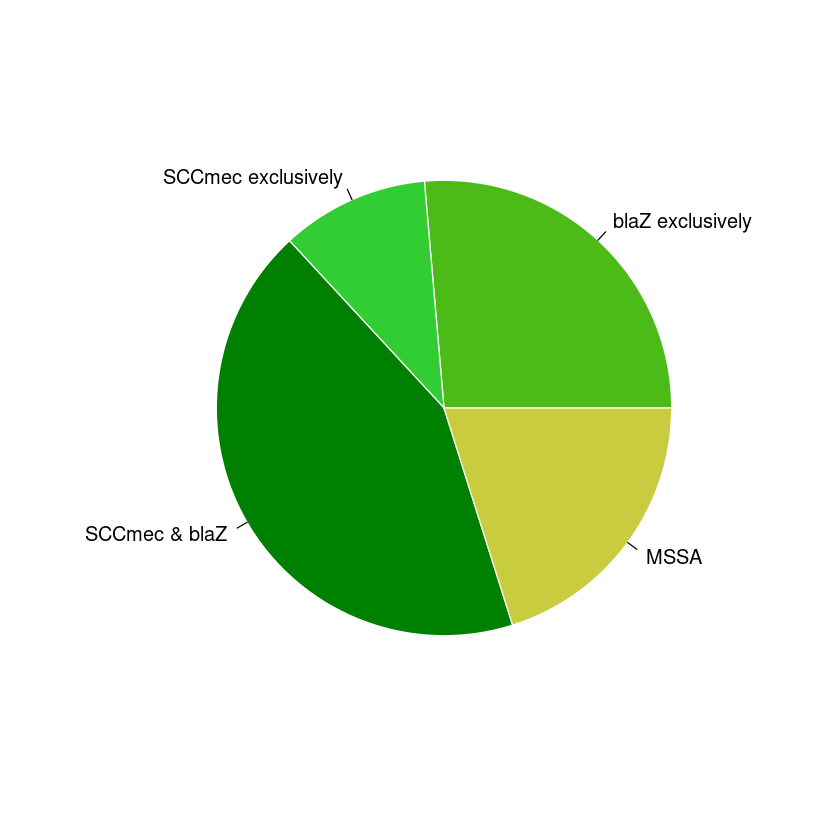

In [5]:
## Plot beta-lactam resistance pie chart 
myPalette <- c("#4CBB17", "#32CD32", "#008000", "#C9CC3F")
blactam_pie <- c(452, 180, 737, 345)
pie(blactam_pie, labels = c("blaZ exclusively","SCCmec exclusively","SCCmec & blaZ","MSSA"), border="white", col=myPalette )

In [8]:
## Adding a new column "Category" based on b-lactam resistance genes presence
abricate_blactams$Category <- ifelse(
  abricate_blactams$blaZ > 0 | abricate_blactams$mecA > 0 | abricate_blactams$mecC > 0,
  "MRSA",
  "MSSA"
)

In [9]:
## Checking the updated dataframe with the new "Category" column
head(abricate_blactams)

write.table(abricate_blactams, "abricate_blactams.tsv", sep = "\t", quote = FALSE, row.names = FALSE, col.names = TRUE) # save it 

,FILE,NUM_FOUND,blaZ,mecA,mecC,Category
,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>
1,GCA_000009005.1_ASM900v1_genomic-ARGs.txt,8,0,0,0,MSSA
2,GCA_000009585.1_ASM958v1_genomic-ARGs.txt,12,100.00,100.00,0,MRSA
3,GCA_000009645.1_ASM964v1_genomic-ARGs.txt,15,100.00,100.00,0,MRSA
4,GCA_000009665.1_ASM966v1_genomic-ARGs.txt,17,0,100.00,0,MRSA
5,GCA_000010445.1_ASM1044v1_genomic-ARGs.txt,15,0,100.00,0,MRSA
6,GCA_000010465.1_ASM1046v1_genomic-ARGs.txt,9,0,0,0,MSSA



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




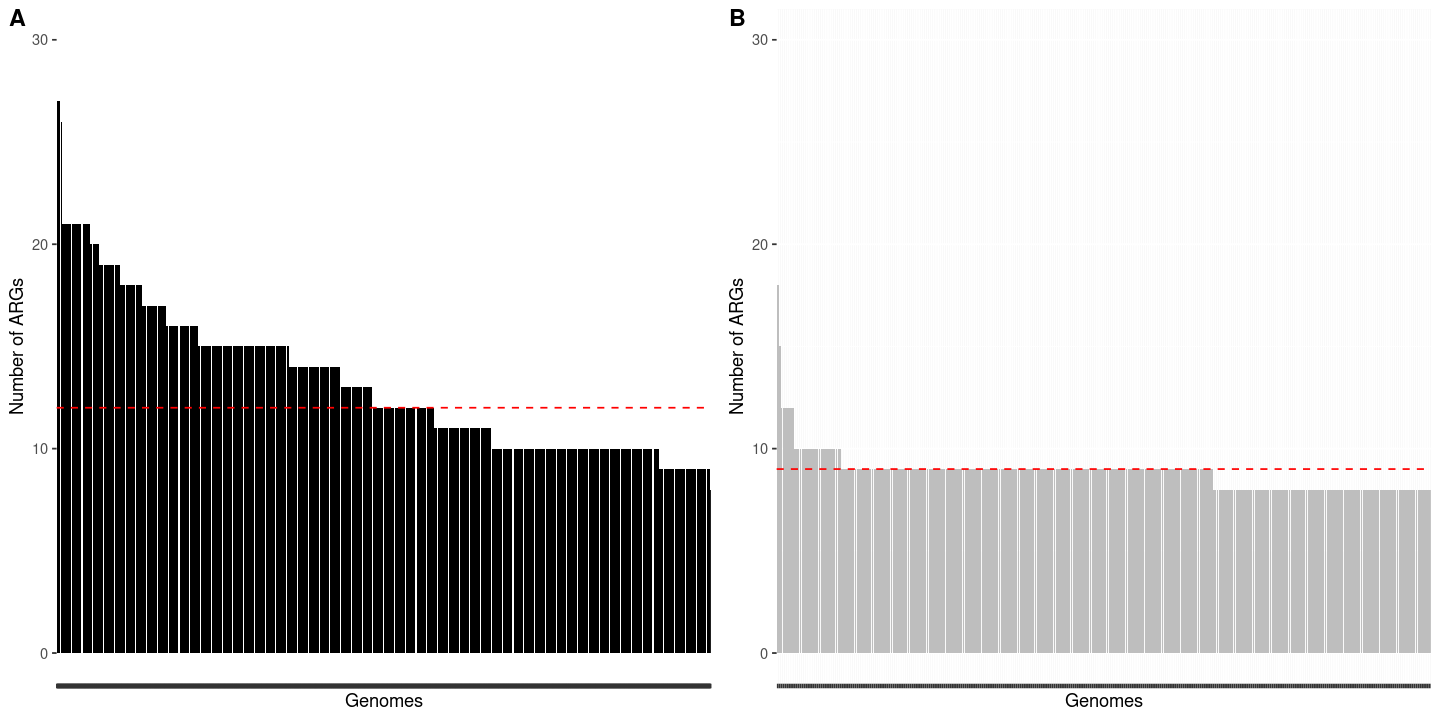

In [10]:
## Creating a barplot with the number of ARGs identified per genome
library(ggplot2)
library(dplyr)
library(ggpubr)

### Filter data for MRSA (Category = "MRSA")
abricate_blactams_mrsa <- abricate_blactams %>%
  filter(Category == "MRSA")

### Create bar plot for MRSA NUM_FOUND with specified y-axis limits
plot_mrsa <- ggplot(abricate_blactams_mrsa, aes(x = reorder(FILE, -NUM_FOUND), y = NUM_FOUND)) +
  geom_bar(stat = "identity", fill = "black") +
  labs(x = "Genomes", y = "Number of ARGs") +
  theme(axis.text.x = element_blank()) +
  ylim(0, 30) + # Set y-axis limits to 0-30
  geom_hline(yintercept = median(abricate_blactams_mrsa$NUM_FOUND), linetype = "dashed", color = "red") 

### Filter data for MSSA (Category = "MSSA")
abricate_blactams_mssa <- abricate_blactams %>%
  filter(Category == "MSSA")

### Create bar plot for MSSA NUM_FOUND with the same y-axis limits
plot_mssa <- ggplot(abricate_blactams_mssa, aes(x = reorder(FILE, -NUM_FOUND), y = NUM_FOUND)) +
  geom_bar(stat = "identity", fill = "gray") +
  labs(x = "Genomes", y = "Number of ARGs") +
  theme(axis.text.x = element_blank()) +
  ylim(0, 30) + # Set y-axis limits to 0-30
  geom_hline(yintercept = median(abricate_blactams_mssa$NUM_FOUND), linetype = "dashed", color = "red")

options(repr.plot.width = 12, repr.plot.height = 6)

### Combine plots using ggpubr
ggarrange(plot_mrsa, plot_mssa, labels = c("A", "B"), ncol = 2, nrow = 1, common.legend = TRUE, align = "hv")

In [11]:
#install.packages("pheatmap")

In [11]:
## Processing ARGs summary output from abricate before plotting it 
### Loop through all columns except the first two (FILE and NUM_FOUND), so that I replace the coverage values by the number of times that ARGs was found in that specific genome (basically creating a count matrix)
for (col in names(abricate.ARGs_summary)[-c(1, 2)]) {
    # Replace ";" with "" (empty string) and calculate the difference in string lengths
    count_semicolons <- nchar(abricate.ARGs_summary[[col]]) - nchar(gsub(";", "", abricate.ARGs_summary[[col]])) + 1
   
    # Replace the original values with the count of semicolons
    abricate.ARGs_summary[[col]] <- count_semicolons
}

### Remove '_genomic.abricate.txt' from the first column
abricate.ARGs_summary$FILE <- gsub("_genomic-ARGs.txt", "", abricate.ARGs_summary$FILE)

### Checking if any ARG hasn't had any hit in the selected genomes
all_na_columns <- which(colSums(is.na(abricate.ARGs_summary)) == nrow(abricate.ARGs_summary))

### Print the names of columns with all NA values
if (length(all_na_columns) > 0) {
    cat("Columns with all NA values:", names(abricate.ARGs_summary)[all_na_columns], "\n")
} else {
    cat("No columns with all NA values found.\n")
} # No columns with all NA values found.

### Mannually checked the highest value to scale my colors accordingly --> 6

library(pheatmap)

### Remove the first column (FILE) as it's not needed for the heatmap
heatmap_abricate_df <- abricate.ARGs_summary[, -1]

### Replace NA with 0 in the entire dataframe
heatmap_abricate_df[is.na(heatmap_abricate_df)] <- 0

### Remove the first column (NUM_FOUND)
heatmap_abricate_df <- heatmap_abricate_df[, -1]

### Create a custom color palette from 0 to 6
color_palette <- colorRampPalette(c("white", "#013208"))(7)  

No columns with all NA values found.


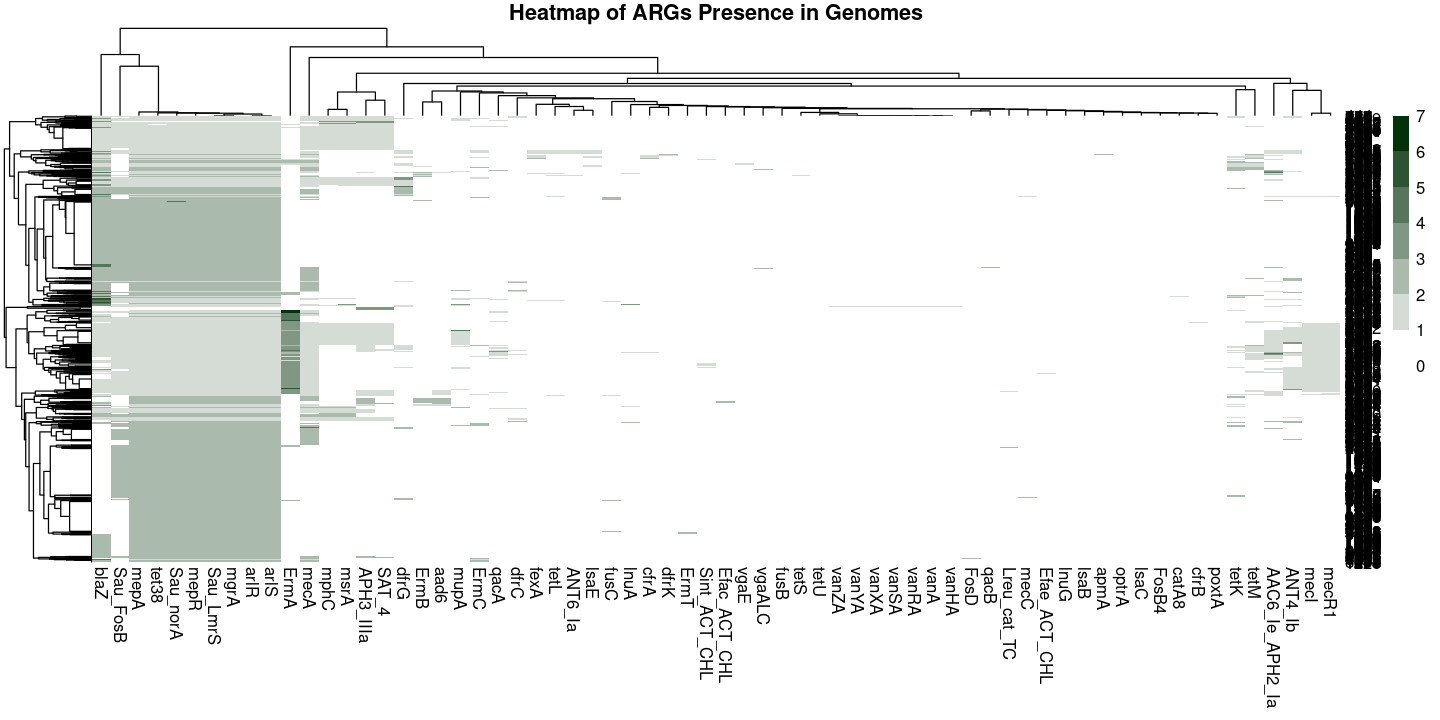

In [12]:
## Create the heatmap
pheatmap(
  heatmap_abricate_df,
  cluster_rows = TRUE,
  cluster_cols = TRUE,
  color = color_palette,
  scale = "row",
  border_color = "grey",
  main = "Heatmap of ARGs Presence in Genomes",
  breaks = seq(0, 7, by = 1)  # Specify the breaks from 0 to 6
)

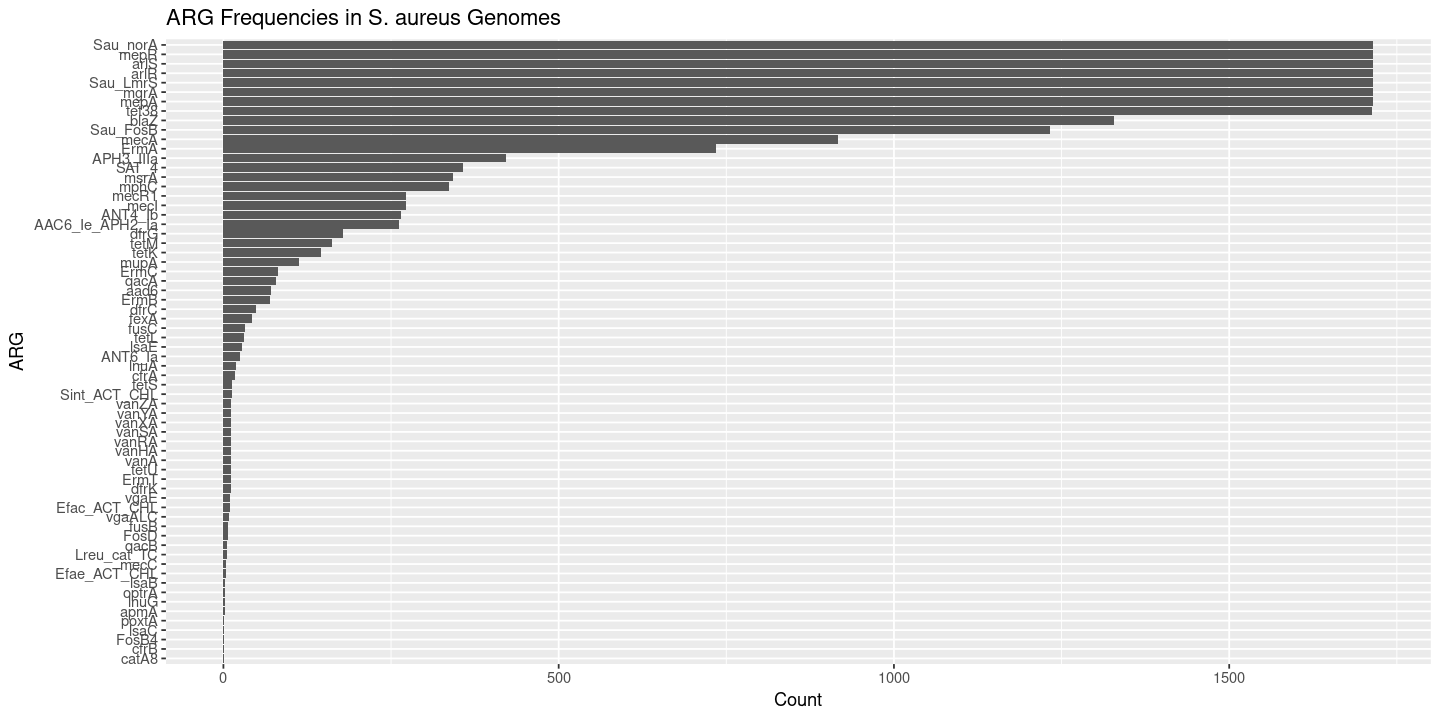

In [13]:
## Creating a bar plot of ARG frequencies in all S. aureus genomes - all ARGs 
# Calculate the sum of values in each column
arg_frequencies <- colSums(heatmap_abricate_df, na.rm = TRUE)

## Create a dataframe for plotting
arg_freq_df <- data.frame(ARG = names(arg_frequencies), Frequency = arg_frequencies)

## Sort the dataframe by Frequency in descending order
arg_freq_df_sorted <- arg_freq_df[order(-arg_freq_df$Frequency), ]

library(ggplot2)
## Create the bar plot with sorted data
ggplot(arg_freq_df_sorted, aes(x = Frequency, y = reorder(ARG, Frequency))) +
  geom_bar(stat = "identity") +
  labs(title = "ARG Frequencies in S. aureus Genomes", x = "Count", y = "ARG") 

In [14]:
## Creating a bar plot of ARG frequencies in all S. aureus genomes - only ARGs with at least 70 hits in all genomes 
ARGs_descript_list <- read.table("data/ARGs_descript_list.tsv", header = TRUE, sep ="\t") 
head(ARGs_descript_list)

,Identified_ARG,Count,Relative_Abundance,Pharmacological_Class,Resistance.Mechanism
,<chr>,<int>,<dbl>,<chr>,<chr>
1,AAC6_Ie_APH2_Ia,262,1.201,aminoglycoside,antibiotic inactivation
2,ANT4_Ib,265,1.215,aminoglycoside,antibiotic inactivation
3,ANT6_Ia,24,0.110,aminoglycoside,antibiotic inactivation
4,APH3_IIIa,421,1.930,aminoglycoside,antibiotic inactivation
5,Efae_ACT_CHL,4,0.018,phenicol,antibiotic inactivation
6,Efac_ACT_CHL,10,0.046,phenicol,antibiotic inactivation


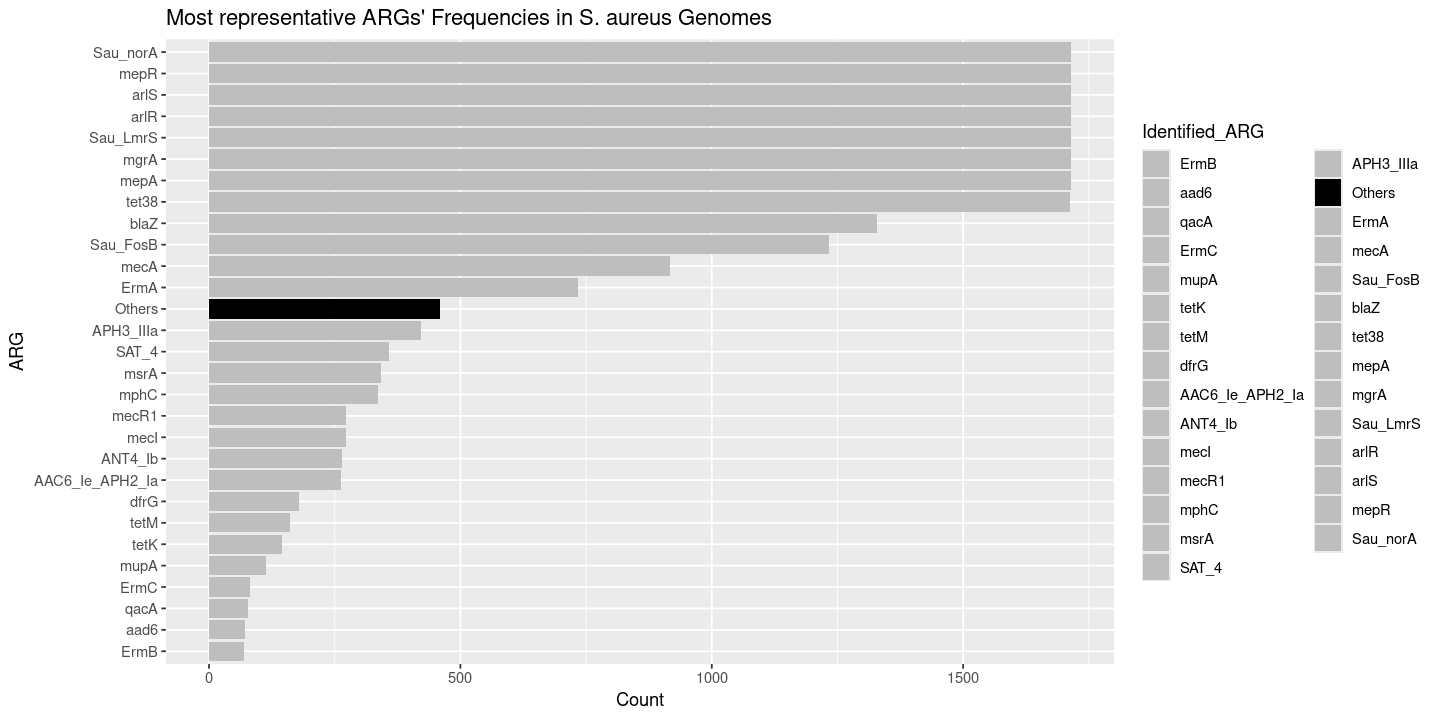

In [15]:
### Filter the data to include only counts greater than or equal to 70
filtered70_ARG_count <- subset(ARGs_descript_list, Count >= 70)

### Create a new category 'Others' for ARGs with Count below 70
others_ARG_count <- data.frame(Count = sum(ARGs_descript_list$Count[ARGs_descript_list$Count < 70]),
                          Identified_ARG = "Others")

### Create an additional row with 'Others' count values  - columns must be the same from filtered70_ARG_count
new_row <- data.frame(Identified_ARG = "Others", Count = 460, Relative_Abundance = "NA", Pharmacological_Class = "NA", Resistance.Mechanism = "NA")

### Combine the filtered data and 'Others' data
combined_data <- rbind(filtered70_ARG_count, new_row) 

### Create a custom color palette
my_colors <- c("Others" = "black")

unique_ARGs <- unique(filtered70_ARG_count$Identified_ARG)
for (ARG in unique_ARGs) {
    my_colors <- c(my_colors, setNames("gray", ARG))
} 

### Reorder Identified_ARG by Count in ascending order
combined_data$Identified_ARG <- reorder(combined_data$Identified_ARG, combined_data$Count)

### Create the barplot with different fill colors
ggplot(combined_data, aes(x = Count, y = Identified_ARG, fill = Identified_ARG)) +
    geom_bar(stat = "identity") +
    labs(title = "Most representative ARGs' Frequencies in S. aureus Genomes", x = "Count", y = "ARG") +
    scale_fill_manual(values = my_colors)

In [17]:
library(ggplot2)
library(dplyr)
library(tidyr)

## Create a new data frame with ARGs grouped by Pharmacological Class
stacked_df <- ARGs_descript_list %>% group_by(Pharmacological_Class, Identified_ARG) %>%
    summarize(Relative_Abundance = sum(Relative_Abundance))
stacked_df <- stacked_df %>% arrange(desc(Relative_Abundance))
print(stacked_df)

### I mannually modified this dataframe, combining the relative abundances of all ARGs belonging to the same cluster or protein family (e.g.: tet = tet38 and tetM)
### Please, use "stacked_df_joint.csv" avaiable in data folder to keep reproducing the analysis

`summarise()` has grouped output by 'Pharmacological_Class'. You can override using the `.groups` argument.


# A tibble: 66 × 3
# Groups:   Pharmacological_Class [14]
   Pharmacological_Class Identified_ARG Relative_Abundance
   <chr>                 <chr>                       <dbl>
 1 MDR                   mepR                         7.86
 2 fluoroquinolone       Sau_norA                     7.86
 3 fluoroquinolone       arlR                         7.86
 4 fluoroquinolone       arlS                         7.86
 5 MDR                   Sau_LmrS                     7.86
 6 MDR                   mepA                         7.86
 7 MDR                   mgrA                         7.86
 8 tetracycline          tet38                        7.85
 9 penam                 blaZ                         6.09
10 fosfomycin            Sau_FosB                     5.65
# ℹ 56 more rows


In [19]:
## Import the modified table for the relative abundance plot 
stacked_df <- read.table("data/stacked_df_joint.csv", header = TRUE, sep =",") 
head(stacked_df)

,Pharmacological_Class,Identified_ARG,Relative_Abundance
,<chr>,<chr>,<dbl>
1,fluoroquinolone,arl,15.720
2,MDR,mep,15.716
3,tetracycline,tet,9.464
4,fluoroquinolone,norA,7.860
5,MDR,lmrS,7.856
6,MDR,mgrA,7.856


In [29]:
## Plotting ARGs relative abundances in S. aureus genomes
gene_colors <- c("#1b4f72", "#21618c", "#2874a6", "#2e86c1", "#3498db", "#5dade2", "#154360", 
                  "#1a5276", "#1f618d", "#5499c7", "#2980b9", "#78281f", "#943126", "#b03a2e", 
                  "#cb4335", "#e74c3c", "#512e5f", "#76448a", "#9b59b6", "#566573", "#283747", 
                  "#6e2c00", "#7b7d7d", "#784212", "#d35400", "#58d68d", "#145a32", "#196f3d", 
                  "#b7950b", "#d4ac0d", "#f1c40f", "#f4d03f", "#212f3d")

args <- c(
  "cfr", "cfrA", "erm", "lmrS", "lsaE", "mep", "mgrA", "msrA", "poxtA", 
  "tetU", "vga", "aad6", "ant", "aph", "apmA", "dfr", "arl", "norA", 
  "qac", "fos", "fus", "van", "lnu", "mphC", "mupA", "SAT_4", "blaZ", 
  "mec", "ACT_CHL", "catA8", "fexA", "optrA", "tet"
)
args
### you can also run " args <- unique(stacked_df$Identified_ARG) " but the other way is better to ensure the colors are matched correctly to ARGs
 
colors <- gene_colors[1:length(args)]

names(colors) <- args # assign colors to ARGs
colors

[1] "cfr"     "cfrA"    "erm"     "lmrS"    "lsaE"    "mep"     "mgrA"   
 [8] "msrA"    "poxtA"   "tetU"    "vga"     "aad6"    "ant"     "aph"    
[15] "apmA"    "dfr"     "arl"     "norA"    "qac"     "fos"     "fus"    
[22] "van"     "lnu"     "mphC"    "mupA"    "SAT_4"   "blaZ"    "mec"    
[29] "ACT_CHL" "catA8"   "fexA"    "optrA"   "tet"

cfr      cfrA       erm      lmrS      lsaE       mep      mgrA      msrA 
"#1b4f72" "#21618c" "#2874a6" "#2e86c1" "#3498db" "#5dade2" "#154360" "#1a5276" 
    poxtA      tetU       vga      aad6       ant       aph      apmA       dfr 
"#1f618d" "#5499c7" "#2980b9" "#78281f" "#943126" "#b03a2e" "#cb4335" "#e74c3c" 
      arl      norA       qac       fos       fus       van       lnu      mphC 
"#512e5f" "#76448a" "#9b59b6" "#566573" "#283747" "#6e2c00" "#7b7d7d" "#784212" 
     mupA     SAT_4      blaZ       mec   ACT_CHL     catA8      fexA     optrA 
"#d35400" "#58d68d" "#145a32" "#196f3d" "#b7950b" "#d4ac0d" "#f1c40f" "#f4d03f" 
      tet 
"#212f3d"

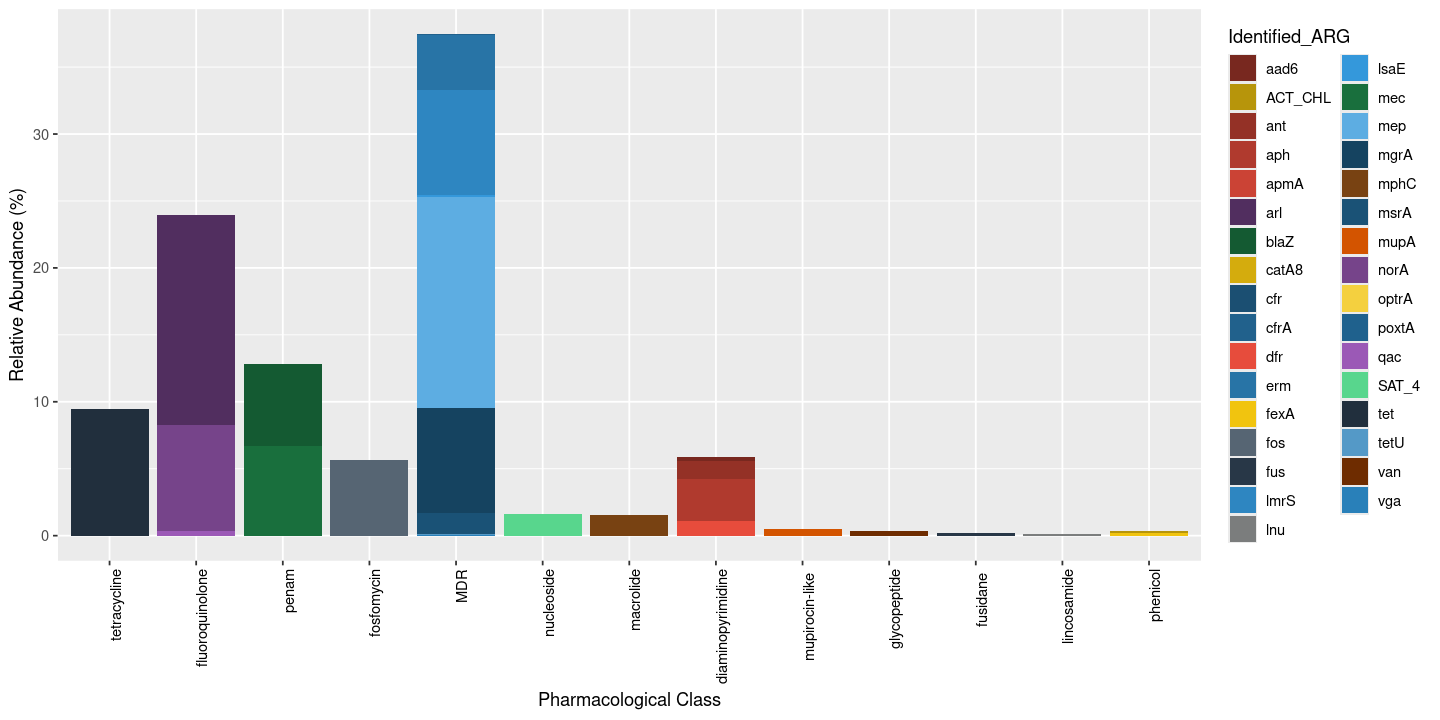

In [30]:
ggplot(stacked_df, aes(x = reorder(Pharmacological_Class, -Relative_Abundance), y = Relative_Abundance, fill = Identified_ARG)) +
    geom_bar(stat = "identity", show.legend = TRUE) +
    labs(x = "Pharmacological Class",
         y = "Relative Abundance (%)") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, color = "black")) +
    scale_fill_manual(values = colors)    


In [31]:
ARGs_byCLASS <- read.table("data/ARGs_byCLASS.tsv", header = TRUE)
head(ARGs_byCLASS)

,Pharmacological_Class,ARGs_Count,Relative_Abundance
,<chr>,<int>,<dbl>
1,Aminoglycoside,1045,8.277
2,Phenicol,76,0.602
3,Fosfomycin,1241,9.830
4,Penam,2795,22.139
5,Nucleoside,358,2.836
6,Fluroquinolone,84,0.665


In [31]:
## Check relative abundances of Resistance Mechanisms 
    
### Create a new data frame with ARGs grouped by Resistance Mechanism
stacked_df2 <- ARGs_descript_list %>% group_by(Resistance.Mechanism, Identified_ARG) %>%
    summarize(Relative_Abundance = sum(Relative_Abundance))
head(stacked_df2)    

`summarise()` has grouped output by 'Resistance.Mechanism'. You can override using the `.groups` argument.


Resistance.Mechanism,Identified_ARG,Relative_Abundance
<chr>,<chr>,<dbl>
antibiotic inactivation,AAC6_Ie_APH2_Ia,1.201
antibiotic inactivation,ANT4_Ib,1.215
antibiotic inactivation,ANT6_Ia,0.110
antibiotic inactivation,APH3_IIIa,1.930
antibiotic inactivation,Efac_ACT_CHL,0.046
antibiotic inactivation,Efae_ACT_CHL,0.018


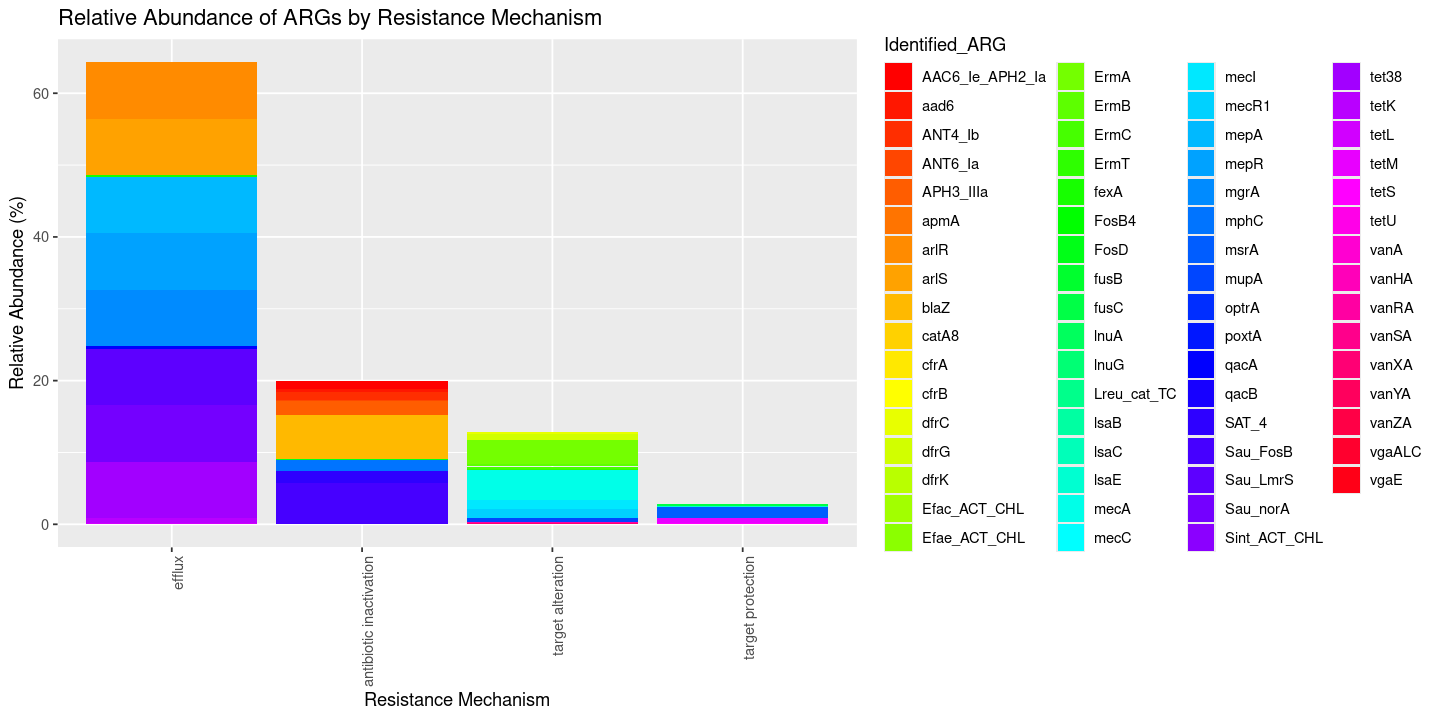

In [33]:
### Plot 
ggplot(stacked_df2, aes(x = reorder(Resistance.Mechanism, - Relative_Abundance), y = Relative_Abundance, fill = Identified_ARG)) +
    geom_bar(stat = "identity") +
    labs(title = "Relative Abundance of ARGs by Resistance Mechanism",
         x = "Resistance Mechanism",
         y = "Relative Abundance (%)") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    scale_fill_manual(values = rainbow(length(unique(stacked_df2$Identified_ARG))))